In [1]:
import pandas as pd
pd.set_option("display.max_columns",None)
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={"figure.figsize":(18,8)},style='darkgrid')
sns.set_palette('rocket')
from time import time
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.metrics import *

In [3]:
train=pd.read_csv("credit card/fraudTrain.csv")
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test=pd.read_csv("credit card/fraudTest.csv")
test.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
test["split"]="test"
train["split"]="train"
df=pd.concat([train,test],axis=0).reset_index(drop=True)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,split
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,train
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,train
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,train
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,train
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,train


df.info()

In [6]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
split                    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'split'],
      dtype='object')

In [10]:
df.drop(columns=['Unnamed: 0','first', 'last','trans_num','unix_time','street','state'],inplace=True)
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,split
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,train
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,train
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,train
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,train
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,Luray,63453,40.4931,-91.8912,519,Town planner,1966-02-13,39.946837,-91.333331,0,test
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,29.661049,-96.186633,0,test
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,99323,46.1966,-118.9017,3684,Musician,1981-11-29,46.658340,-119.715054,0,test
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,Mesa,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,44.470525,-117.080888,0,test


In [11]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'],format='mixed')

In [12]:
df['hour']=df['trans_date_trans_time'].dt.hour

In [15]:
fraud=df[df['is_fraud']==1]

<Axes: xlabel='hour'>

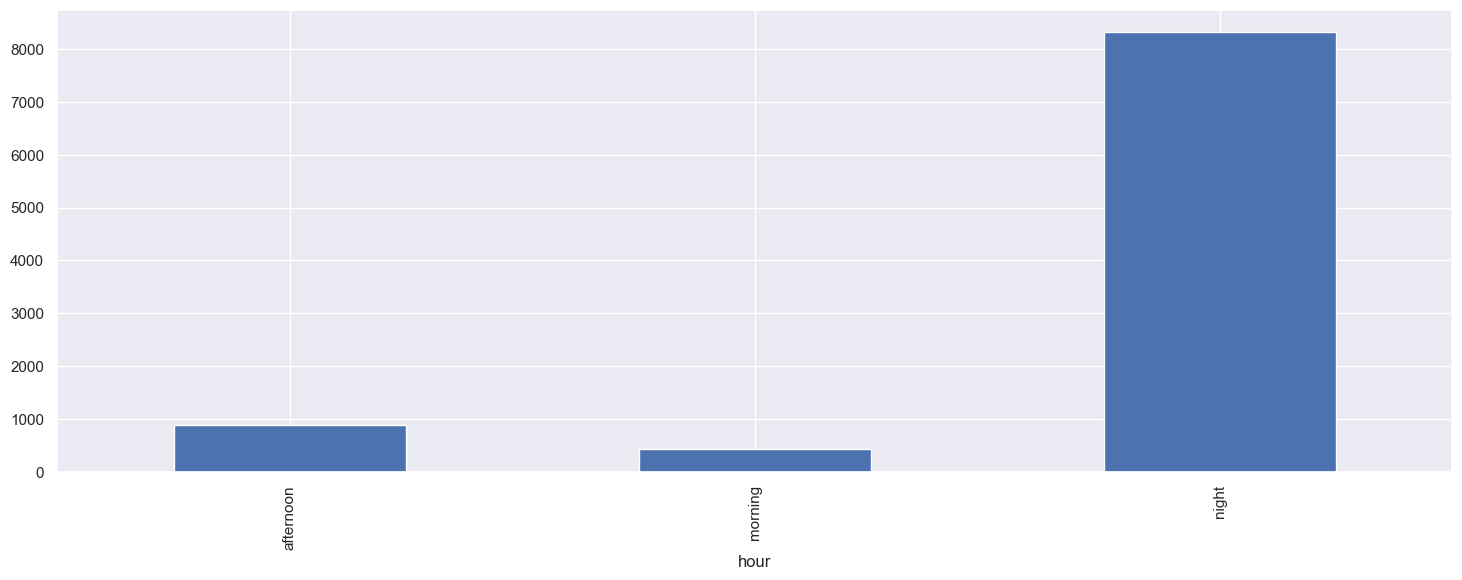

In [130]:
df[df['is_fraud'] == 1].groupby('hour').count()['is_fraud'].plot(kind='bar')

In [17]:
def map_time_of_day(hour):
    if 0 <= hour <= 4:
        return 'night'
    elif 5 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 20:
        return 'afternoon'
    else:
        return 'night'



In [18]:

#df['hour'] = df['hour'].apply(map_time_of_day)

In [19]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,split,hour
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,train,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,train,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,train,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,train,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,train,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,Luray,63453,40.4931,-91.8912,519,Town planner,1966-02-13,39.946837,-91.333331,0,test,23
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,29.661049,-96.186633,0,test,23
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,99323,46.1966,-118.9017,3684,Musician,1981-11-29,46.658340,-119.715054,0,test,23
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,Mesa,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,44.470525,-117.080888,0,test,23


<Axes: ylabel='count'>

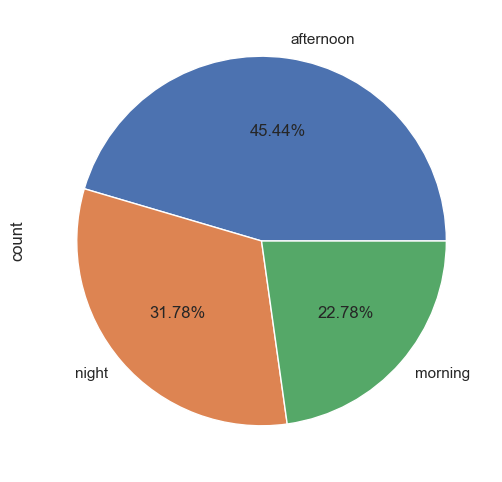

In [147]:
df['hour'].value_counts().plot(kind='pie',autopct="%.2f%%")

In [21]:
fraud['hour'] = fraud['hour'].apply(map_time_of_day)

In [22]:
fraud['hour'].value_counts()

hour
night        8331
afternoon     883
morning       437
Name: count, dtype: int64

In [23]:
df['dob']=pd.to_datetime(df['dob'],format='mixed')
df['age']=(df['trans_date_trans_time'].dt.year-df['dob'].dt.year).astype(int)

In [24]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,split,hour,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,train,0,31
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,train,0,41
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,train,0,57
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,train,0,52
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,train,0,33


In [25]:
from geopy.distance import great_circle

df['distance_km']=df.apply(lambda col : round(great_circle((col['lat'],col['long']),(col['merch_lat'],col['merch_long'])).kilometers,2),axis=1)

In [26]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,split,hour,age,distance_km
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,train,0,31,78.60
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,train,0,41,30.21
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,train,0,57,108.21
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,train,0,52,95.67
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,train,0,33,77.56


In [27]:
def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c  # Radius of Earth in kilometers
    return round(km,2)

# Apply the Haversine formula
fraud['distance_km'] = fraud.apply(lambda row: haversine_distance(row['merch_lat'],row['merch_long'], row['lat'], row['long']), axis=1)

# Display the DataFrame
fraud

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,split,hour,distance_km
2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,36.430124,-81.179483,1,train,night,68.95
2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,29.819364,-99.142791,1,train,night,78.41
2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,F,San Antonio,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,29.273085,-98.836360,1,train,night,41.01
2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,M,Collettsville,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,35.909292,-82.091010,1,train,night,34.15
2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,F,San Antonio,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,29.786426,-98.683410,1,train,night,44.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813872,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,34.573471,-89.911011,1,test,night,6.95
1813949,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,34.091227,-90.390612,1,test,night,75.96
1814016,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,34.628434,-90.284780,1,test,night,36.53
1814204,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,34.746063,-90.401093,1,test,night,48.81


In [28]:
df.drop(columns=['dob','lat','long','merch_long','merch_lat'],inplace=True)

In [29]:
#SUMMARY STATS
df.describe().T

,count,mean,min,25%,50%,75%,max,std
trans_date_trans_time,1852394,2020-01-20 21:31:46.801827328,2019-01-01 00:00:18,2019-07-23 04:13:43.750000128,2020-01-02 01:15:31,2020-07-23 12:11:25.249999872,2020-12-31 23:59:34,NaN
cc_num,1852394.0,417386038393710400.0,60416207185.0,180042946491150.0,3521417320836166.0,4642255475285942.0,4992346398065154048.0,1309115265318734848.0
amt,1852394.0,70.063567,1.0,9.64,47.45,83.1,28948.9,159.253975
zip,1852394.0,48813.258191,1257.0,26237.0,48174.0,72042.0,99921.0,26881.845966
city_pop,1852394.0,88643.674509,23.0,741.0,2443.0,20328.0,2906700.0,301487.618344
is_fraud,1852394.0,0.00521,0.0,0.0,0.0,0.0,1.0,0.071992
hour,1852394.0,12.806119,0.0,7.0,14.0,19.0,23.0,6.815753
age,1852394.0,46.21138,14.0,33.0,44.0,57.0,96.0,17.395446
distance_km,1852394.0,76.111833,0.02,55.32,78.22,98.51,152.12,29.117007


In [30]:
#SUMMARY STATS
df.describe(include='object').T

,count,unique,top,freq
merchant,1852394,693,fraud_Kilback LLC,6262
category,1852394,14,gas_transport,188029
gender,1852394,2,F,1014749
city,1852394,906,Birmingham,8040
job,1852394,497,Film/video editor,13898
split,1852394,2,train,1296675


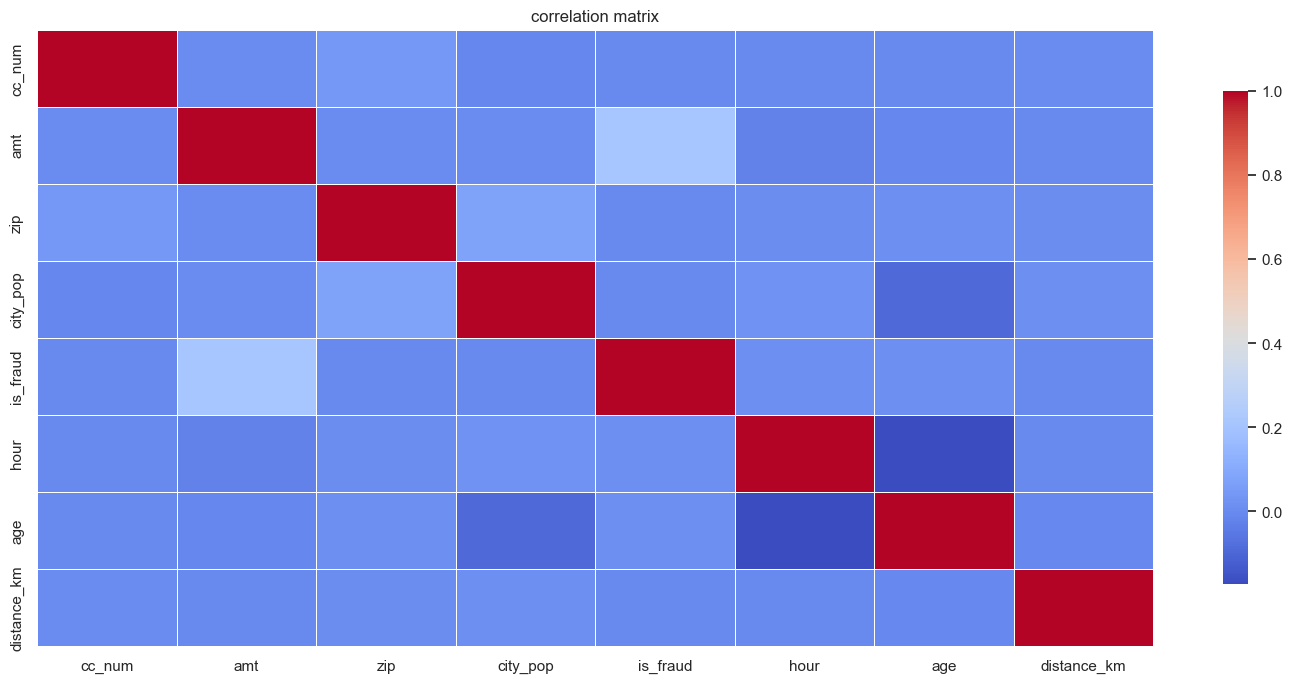

In [31]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=None,cmap='coolwarm',fmt='.2f',linewidth=0.5,cbar_kws={'shrink':0.8})
plt.title('correlation matrix')
plt.show()

In [32]:
df.select_dtypes(include='number').corr()

,cc_num,amt,zip,city_pop,is_fraud,hour,age,distance_km
cc_num,1.000000,0.001826,0.041504,-0.009118,-0.001125,-0.000902,-0.000131,0.003082
amt,0.001826,1.000000,0.001979,0.004921,0.209308,-0.024891,-0.010695,-0.000538
zip,0.041504,0.001979,1.000000,0.077601,-0.002190,0.005947,0.010359,0.006750
city_pop,-0.009118,0.004921,0.077601,1.000000,0.000325,0.019949,-0.090889,0.010989
is_fraud,-0.001125,0.209308,-0.002190,0.000325,1.000000,0.013196,0.010927,0.000359
hour,-0.000902,-0.024891,0.005947,0.019949,0.013196,1.000000,-0.173014,0.000391
age,-0.000131,-0.010695,0.010359,-0.090889,0.010927,-0.173014,1.000000,-0.004155
distance_km,0.003082,-0.000538,0.006750,0.010989,0.000359,0.000391,-0.004155,1.000000


In [33]:
df['hour'] = df['hour'].apply(map_time_of_day)

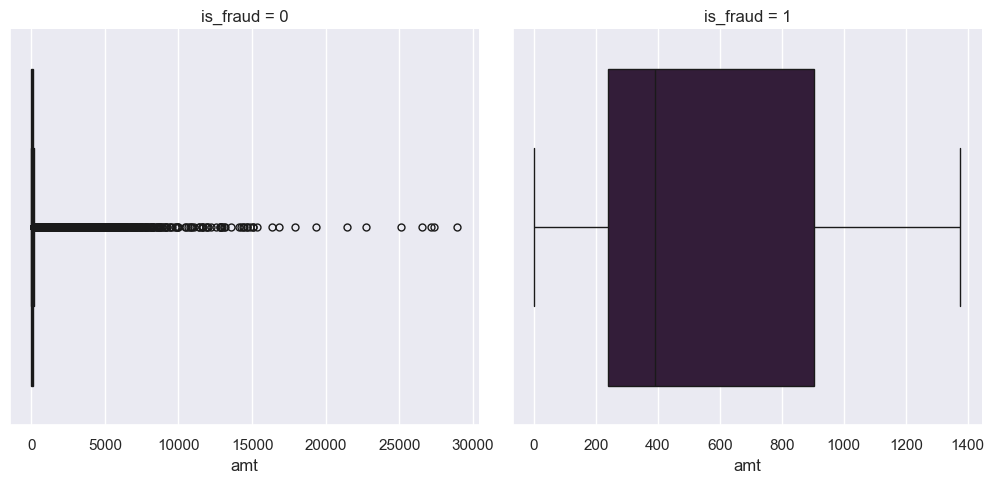

In [34]:
sns.catplot(data=df,x='amt',col='is_fraud',kind='box',sharex=False)

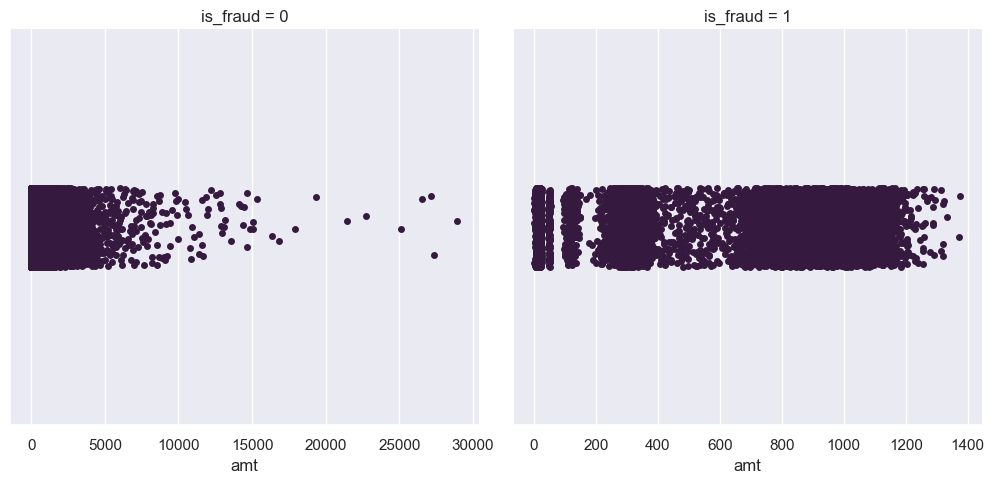

In [35]:
sns.catplot(data=df,x='amt',col='is_fraud',kind='strip',sharex=False)

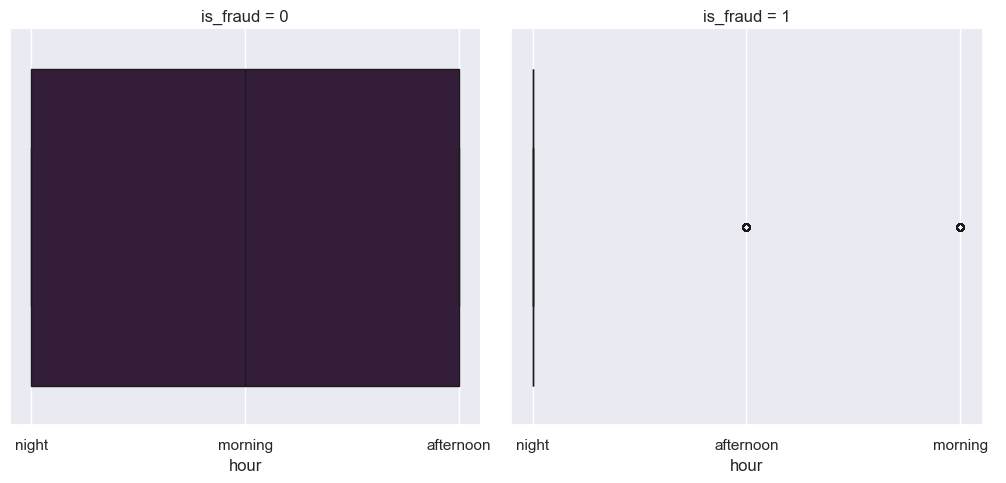

In [36]:
sns.catplot(data=df,x='hour',col='is_fraud',kind='box',sharex=False)

In [37]:
def pie_bar_plot(col):
    print(df[col].value_counts())
    sns.set_palette("Spectral")
    fig,axs=plt.subplots(1,2)
    axs[0].pie(df[col].value_counts().values.tolist(),autopct="%.2f%%",textprops={'fontsize':25},shadow=True)
    sns.countplot(data=df,x=col,hue='is_fraud',palette=['blue','orange'],ax=axs[1])
    fig.legend(labels=df[col].value_counts().index.tolist(),loc='upper left',fontsize=20)
    fig.tight_layout()
    fig.show()

gender
F    1014749
M     837645
Name: count, dtype: int64


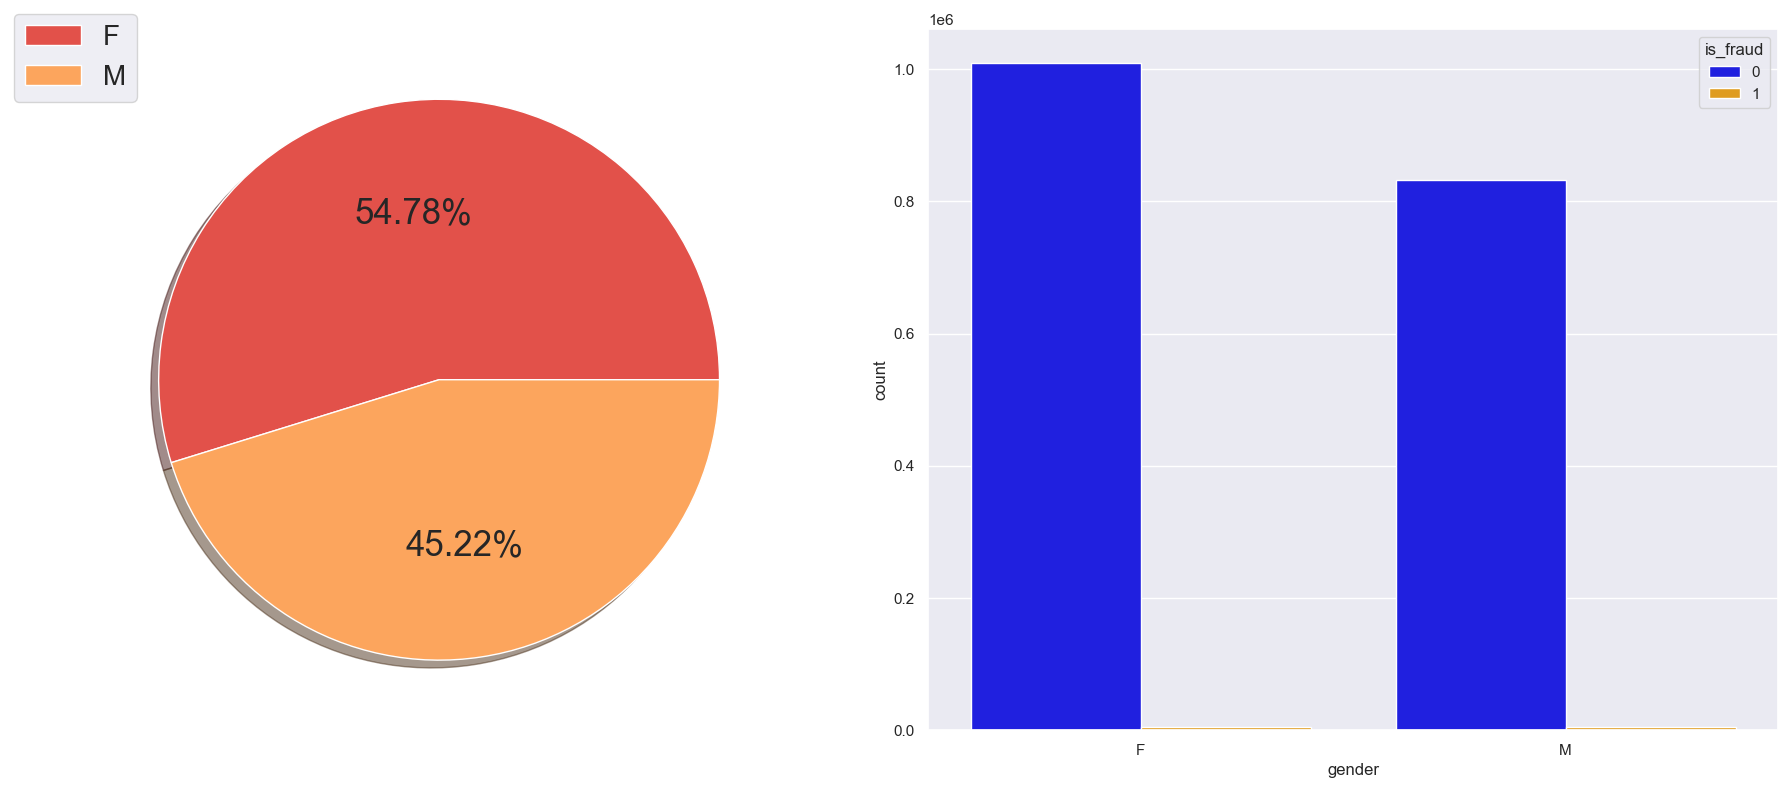

In [38]:
pie_bar_plot('gender')

hour
afternoon    841683
night        588697
morning      422014
Name: count, dtype: int64


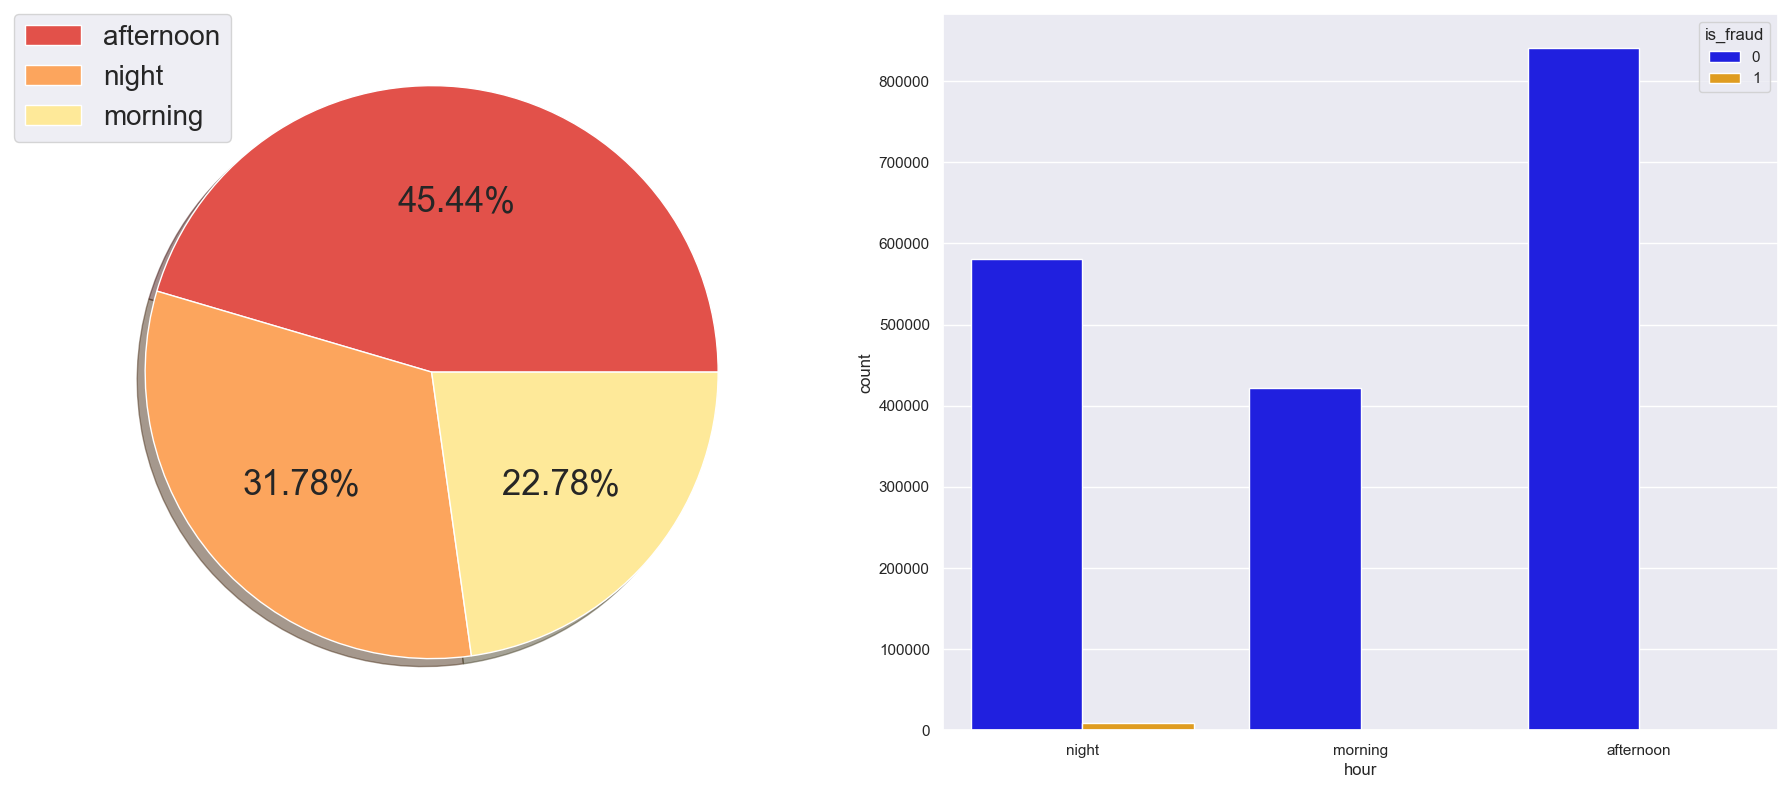

In [39]:
pie_bar_plot('hour')

is_fraud
0    1842743
1       9651
Name: count, dtype: int64


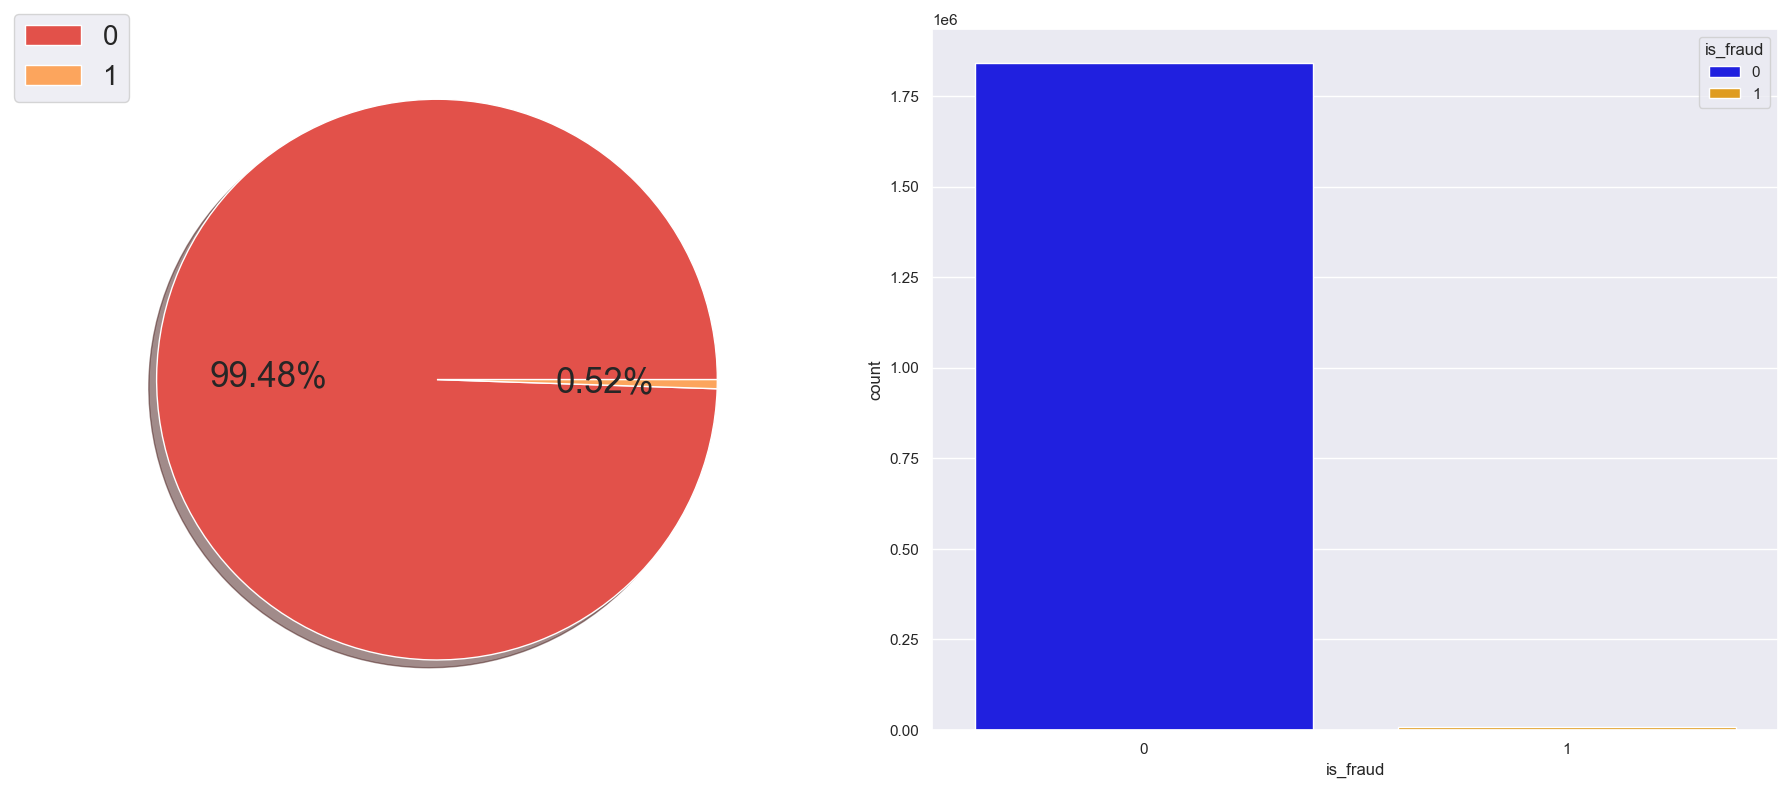

In [40]:
pie_bar_plot('is_fraud')

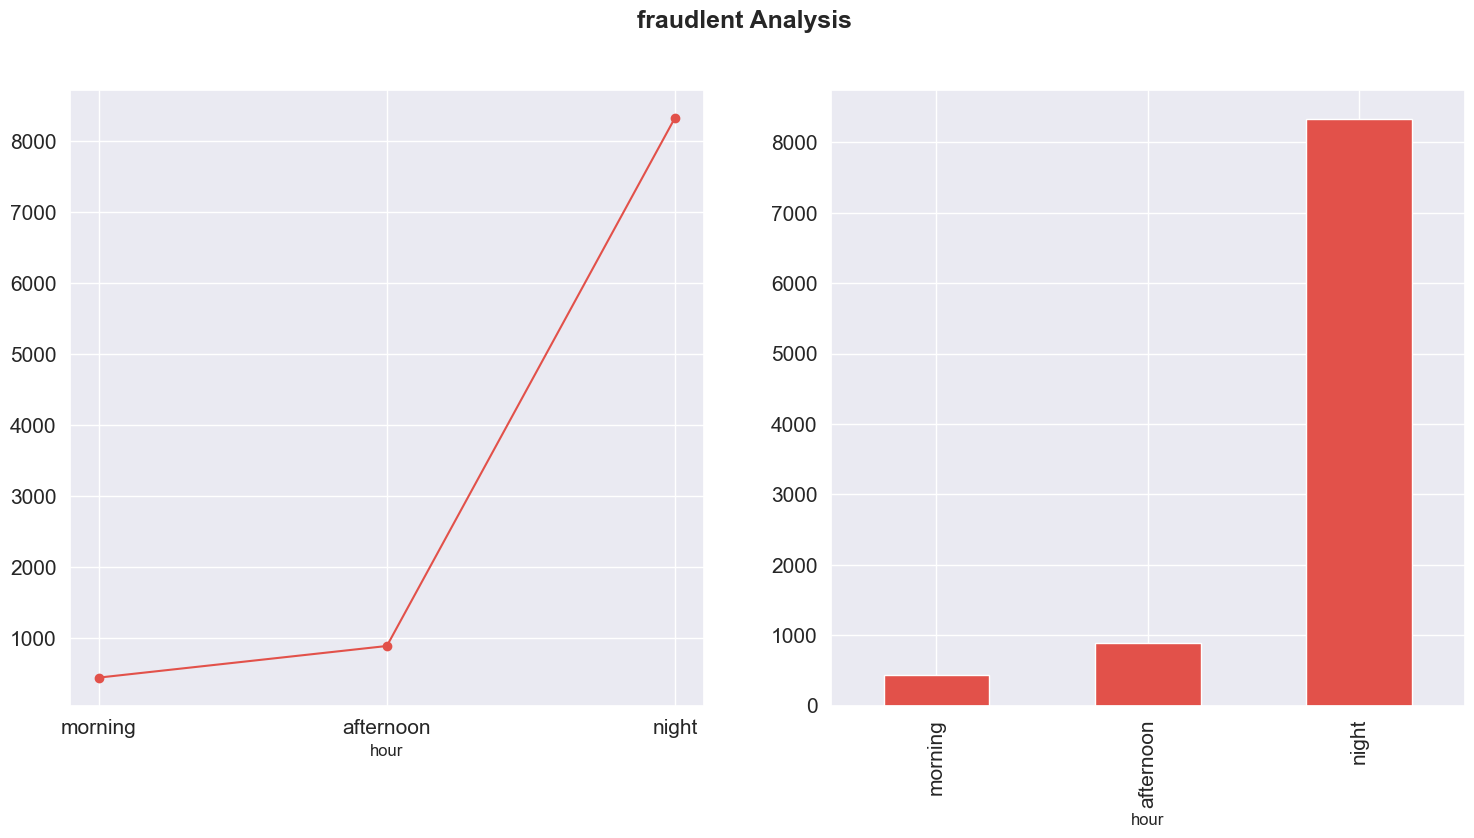

In [41]:
fig,axs=plt.subplots(1,2)
fig.suptitle("fraudlent Analysis",fontsize=18,fontweight='bold')
df.loc[df["is_fraud"]==1,'hour'].value_counts(ascending=True).plot(kind='line',ax=axs[0],marker='o',fontsize=15)
axs[0].set_xticks(range(0,3))
df.loc[df['is_fraud']==1,'hour'].value_counts(ascending=True).plot(kind='bar',ax=axs[1],fontsize=15)
plt.show()

In [42]:
df.loc[df['is_fraud']==1,['gender']].value_counts()

gender
F         4899
M         4752
Name: count, dtype: int64

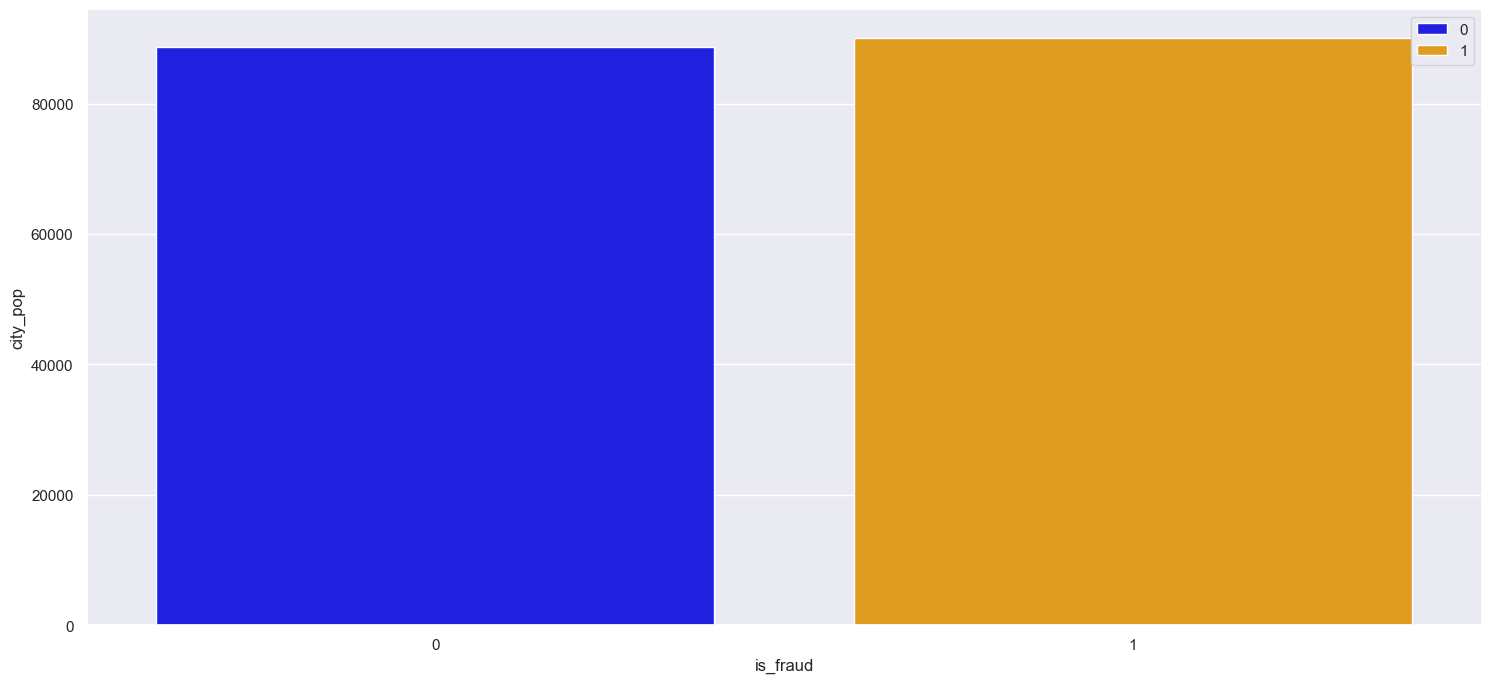

In [43]:
from scipy.stats import ttest_ind
sns.barplot(data=df,x='is_fraud',y='city_pop',hue='is_fraud',palette=['blue','orange'],ci=None)
plt.legend(loc='upper right')
plt.show()

In [44]:
f_pop=df[df['is_fraud']==1]['city_pop']
na_f_pop=df[df['is_fraud']==1]['city_pop']
t_stat,p_value=ttest_ind(f_pop,na_f_pop)
print(f'T-test: t-statistic = {round(t_stat,3)}, p-value = {round(p_value,2)}, p-value<0.05? = {p_value<0.05}')

T-test: t-statistic = 0.0, p-value = 1.0, p-value<0.05? = False


Text(0, 0.5, 'Frequency')

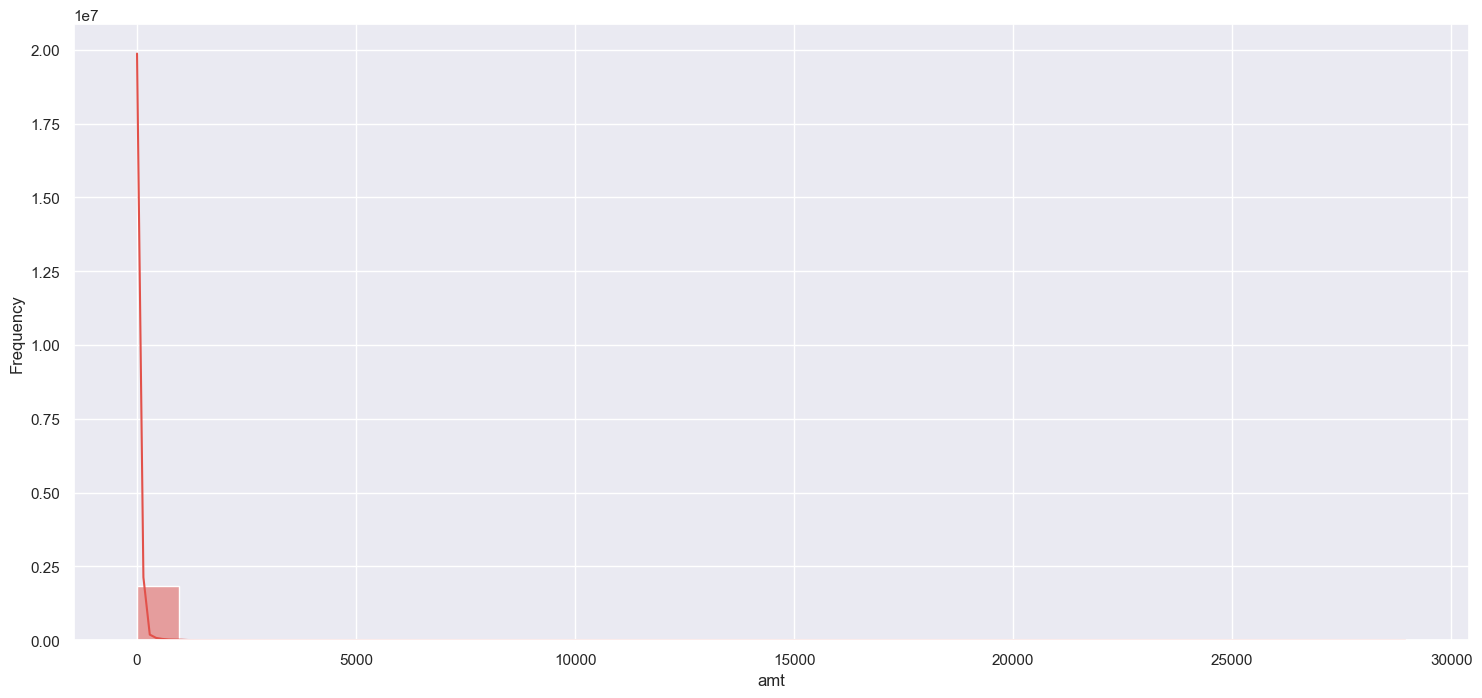

In [45]:
sns.histplot(data=df,x='amt',bins=30,kde=True)
plt.ylabel('Frequency')

In [46]:
df=pd.get_dummies(df,columns=['gender'],drop_first=True)

In [47]:
#we will get the time between transactions for each card
#Time=0 for every first transaction and time will be represented in hours.
df.sort_values(['cc_num','trans_date_trans_time'],inplace=True)
df['hours_diff_bet_trans']=((df.groupby('cc_num')[['trans_date_trans_time']].diff())/np.timedelta64(1,'h'))

In [48]:
df.loc[df['hours_diff_bet_trans'].isna(),'hours_diff_bet_trans']=0
df['hours_diff_bet_trans']=df['hours_diff_bet_trans'].astype(int)

In [49]:
from scipy import stats

t,p=stats.ttest_ind(df[df['is_fraud']==0]['hours_diff_bet_trans'],df[df['is_fraud']==1]['hours_diff_bet_trans'],alternative='two-sided')
print(t,p)

21.308600246531245 9.715494713957777e-101


In [50]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,city,zip,city_pop,job,is_fraud,split,hour,age,distance_km,gender_M,hours_diff_bet_trans
1017,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Fort Washakie,82514,1645,Information systems manager,0,train,afternoon,33,127.61,False,0
2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,gas_transport,52.94,Fort Washakie,82514,1645,Information systems manager,0,train,morning,33,110.31,False,19
2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,gas_transport,82.08,Fort Washakie,82514,1645,Information systems manager,0,train,morning,33,21.79,False,0
2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,kids_pets,34.79,Fort Washakie,82514,1645,Information systems manager,0,train,afternoon,33,87.20,False,3
2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,home,27.18,Fort Washakie,82514,1645,Information systems manager,0,train,afternoon,33,74.21,False,0


<Axes: xlabel='is_fraud', ylabel='hours_diff_bet_trans'>

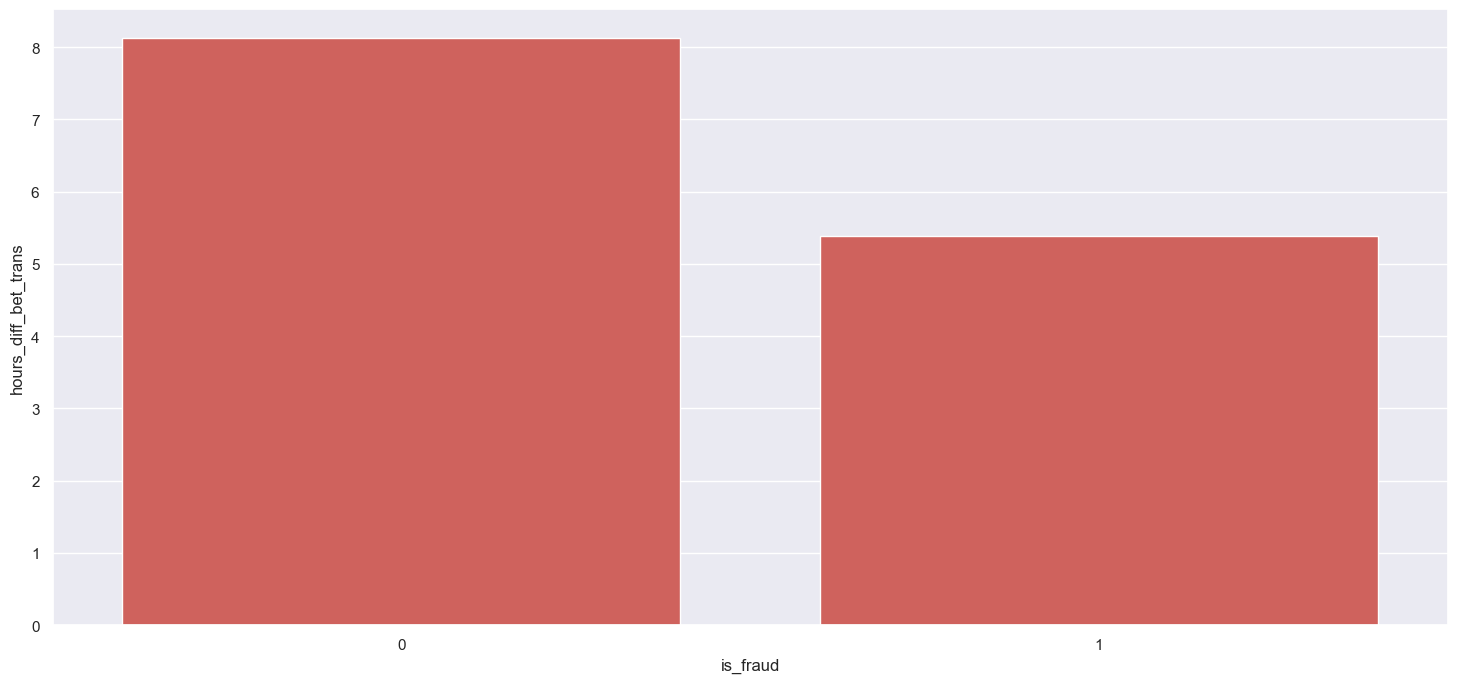

In [51]:
sns.barplot(data=df,x='is_fraud',y='hours_diff_bet_trans',ci=None)

In [52]:
freq=df.groupby('cc_num').size()
freq

cc_num
60416207185            2196
60422928733            2200
60423098130             738
60427851591             743
60487002085             735
                       ... 
4958589671582726883    2191
4973530368125489546    1467
4980323467523543940     736
4989847570577635369    1471
4992346398065154184    2922
Length: 999, dtype: int64

In [53]:
df['cc_freq']=df['cc_num'].apply(lambda x:freq[x])
df[['cc_num','cc_freq']].head()

,cc_num,cc_freq
1017,60416207185,2196
2724,60416207185,2196
2726,60416207185,2196
2882,60416207185,2196
2907,60416207185,2196


In [54]:
def his_show(col):
    fig,axs=plt.subplots(1,2,sharex=True)
    for i in [0,1]:
        sns.histplot(df[df['is_fraud']==i][col],bins=6,ax=axs[i])
        

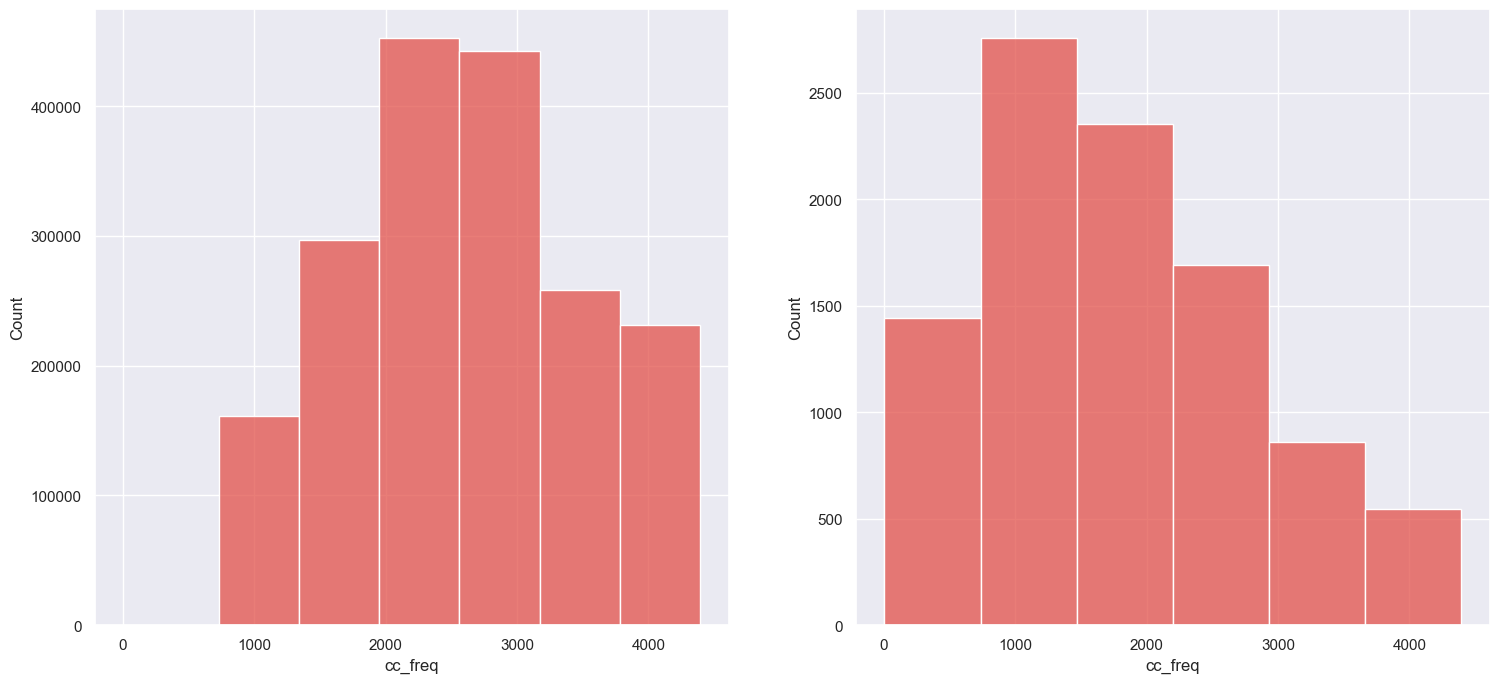

In [55]:
his_show('cc_freq')

In [56]:
def class_det(x):
    for idx,val in enumerate(list(range(800,5000,800))):
        if x<val:
            return idx+1

In [57]:
df['cc_freq_class']=df['cc_freq'].apply(class_det)
print(df['cc_freq_class'].unique())

[3 1 2 4 5 6]


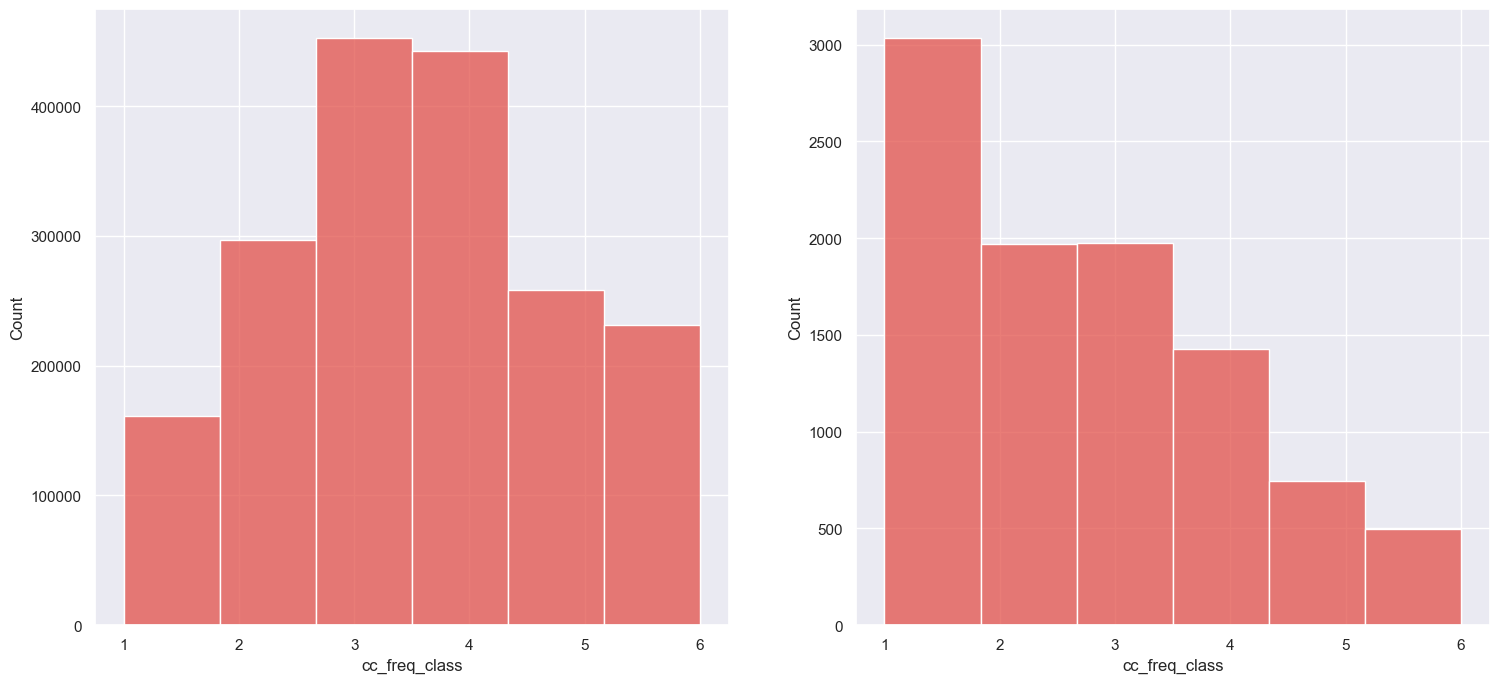

In [58]:
his_show('cc_freq_class')

In [59]:
df.drop(columns=['cc_num','trans_date_trans_time','city_pop'],inplace=True)

In [60]:
df.drop(columns=['zip'],inplace=True)

In [61]:
df.columns

Index(['merchant', 'category', 'amt', 'city', 'job', 'is_fraud', 'split',
       'hour', 'age', 'distance_km', 'gender_M', 'hours_diff_bet_trans',
       'cc_freq', 'cc_freq_class'],
      dtype='object')

In [62]:
df=df[['cc_freq', 'cc_freq_class','city','job','age','gender_M','merchant','category','distance_km','hour','hours_diff_bet_trans','amt','is_fraud','split']]

In [63]:
df.to_csv('cleaned.csv',index=False)

In [64]:
df.drop(columns=['merchant'],inplace=True)

In [65]:
df.head()

,cc_freq,cc_freq_class,city,job,age,gender_M,category,distance_km,hour,hours_diff_bet_trans,amt,is_fraud,split
1017,2196,3,Fort Washakie,Information systems manager,33,False,misc_net,127.61,afternoon,0,7.27,0,train
2724,2196,3,Fort Washakie,Information systems manager,33,False,gas_transport,110.31,morning,19,52.94,0,train
2726,2196,3,Fort Washakie,Information systems manager,33,False,gas_transport,21.79,morning,0,82.08,0,train
2882,2196,3,Fort Washakie,Information systems manager,33,False,kids_pets,87.20,afternoon,3,34.79,0,train
2907,2196,3,Fort Washakie,Information systems manager,33,False,home,74.21,afternoon,0,27.18,0,train


In [66]:
df['city'].unique()

array(['Fort Washakie', 'North Augusta', 'Amorita', 'Burns Flat',
       'Jackson', 'Haynes', 'Dallas', 'Greenview', 'Clearwater', 'Dexter',
       'West Decatur', 'Coulee Dam', 'Meadville', 'New York City',
       'Gadsden', 'Garrattsville', 'Kissee Mills', 'Marion',
       'Saint James City', 'Grifton', 'San Antonio', 'Freeport',
       'Liberty Mills', 'Washington', 'Jordan Valley', 'Houston',
       'Christine', 'Allentown', 'Mc Clellandtown', 'Elberta',
       'Louisville', 'Jaffrey', 'Wilmette', 'Spring Church', 'La Grande',
       'Montrose', 'Lahoma', 'Desdemona', 'Cochranton', 'Waupaca',
       'Coleharbor', 'Kirkwood', 'Republic', 'Orient', 'Thomas', 'Cass',
       'May', 'Wetmore', 'Cascade Locks', 'Hazel', 'Helm',
       'Hannawa Falls', 'Olmsted', 'Leetsdale', 'Broomfield', 'Curlew',
       'Armonk', 'Beaver Falls', 'Sprague', 'Ogdensburg', 'Napa',
       'Scotts Mills', 'Eagarville', 'Santa Monica', 'Albany', 'Altair',
       'Parker Dam', 'West Palm Beach', 'Cape Coral',

In [67]:
df['job'].unique()

array(['Information systems manager', 'Secondary school teacher',
       "Barrister's clerk", "Politician's assistant",
       'Horticulturist, commercial', 'Programmer, applications',
       'Television camera operator', 'Call centre manager',
       'Chief Marketing Officer', 'Buyer, industrial',
       'Armed forces logistics/support/administrative officer',
       'Pilot, airline', 'Therapist, horticultural', 'Dancer',
       'Ceramics designer', 'Naval architect', 'Engineer, agricultural',
       'Health service manager', 'Sport and exercise psychologist',
       'Forensic psychologist', 'Exhibition designer',
       "Nurse, children's", 'Soil scientist', 'Prison officer',
       'Economist', 'Copywriter, advertising', 'Television floor manager',
       'Lecturer, higher education', 'Sales professional, IT',
       'Exhibitions officer, museum/gallery', 'Freight forwarder',
       'Engineering geologist', 'Surveyor, hydrographic',
       'Trade mark attorney', 'Public relations ac

In [68]:
df['category'].unique()

array(['misc_net', 'gas_transport', 'kids_pets', 'home', 'shopping_net',
       'food_dining', 'personal_care', 'grocery_pos', 'entertainment',
       'shopping_pos', 'misc_pos', 'travel', 'health_fitness',
       'grocery_net'], dtype=object)

In [69]:
df=pd.read_csv('cleaned.csv')

In [70]:
df.drop("merchant",axis=1,inplace=True)

In [71]:
df

,cc_freq,cc_freq_class,city,job,age,gender_M,category,distance_km,hour,hours_diff_bet_trans,amt,is_fraud,split
0,2196,3,Fort Washakie,Information systems manager,33,False,misc_net,127.61,afternoon,0,7.27,0,train
1,2196,3,Fort Washakie,Information systems manager,33,False,gas_transport,110.31,morning,19,52.94,0,train
2,2196,3,Fort Washakie,Information systems manager,33,False,gas_transport,21.79,morning,0,82.08,0,train
3,2196,3,Fort Washakie,Information systems manager,33,False,kids_pets,87.20,afternoon,3,34.79,0,train
4,2196,3,Fort Washakie,Information systems manager,33,False,home,74.21,afternoon,0,27.18,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2922,4,Mc Nabb,Audiological scientist,64,True,gas_transport,44.89,night,2,66.11,0,test
1852390,2922,4,Mc Nabb,Audiological scientist,64,True,misc_net,81.49,morning,3,4.58,0,test
1852391,2922,4,Mc Nabb,Audiological scientist,64,True,gas_transport,36.05,morning,6,95.96,0,test
1852392,2922,4,Mc Nabb,Audiological scientist,64,True,grocery_pos,81.77,morning,0,149.48,0,test


In [72]:
from category_encoders import WOEEncoder
df.drop(columns=['city'],inplace=True)
df['gender_M']=df['gender_M'].map({False:0,True:1})
# Assuming you have a DataFrame df with categorical features
encoder = WOEEncoder(cols=['job', 'category','hour'])
encoded_df = encoder.fit_transform(df[['cc_freq', 'cc_freq_class', 'job', 'age','gender_M', 'category',
       'distance_km', 'hour', 'hours_diff_bet_trans', 'amt']], df['is_fraud'])
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#encoder=label_encoder.fit_transform(df[['cc_freq', 'cc_freq_class', 'job', 'age','gender_M', 'category','distance_km', 'hour', 'hours_diff_bet_trans', 'amt']])

In [73]:
#encoded_df=df

In [96]:
encoder.feature_names_out_

['cc_freq',
 'cc_freq_class',
 'job',
 'age',
 'gender_M',
 'category',
 'distance_km',
 'hour',
 'hours_diff_bet_trans',
 'amt']

In [98]:
data={'cc_freq':2196,
 'cc_freq_class':3,
 'job':'Information systems manager',
 'age':33,
 'gender_M':0,
 'category':'misc_net',
 'distance_km':127.61,
 'hour':'afternoon',
 'hours_diff_bet_trans':0,
 'amt':7.27}

In [99]:
encoder.transform([data])

,cc_freq,cc_freq_class,job,age,gender_M,category,distance_km,hour,hours_diff_bet_trans,amt
0,2196,3,0.163804,33,0,0.92586,127.61,-1.60591,0,7.27


In [97]:
encoded_df

,cc_freq,cc_freq_class,job,age,gender_M,category,distance_km,hour,hours_diff_bet_trans,amt,is_fraud,split
0,2196,3,0.163804,33,0,0.925860,127.61,-1.605910,0,7.27,0,train
1,2196,3,0.163804,33,0,-0.238221,110.31,-1.617798,19,52.94,0,train
2,2196,3,0.163804,33,0,-0.238221,21.79,-1.617798,0,82.08,0,train
3,2196,3,0.163804,33,0,-1.019735,87.20,-1.605910,3,34.79,0,train
4,2196,3,0.163804,33,0,-1.238421,74.21,-1.605910,0,27.18,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2922,4,0.253157,64,1,-0.238221,44.89,1.008186,2,66.11,0,test
1852390,2922,4,0.253157,64,1,0.925860,81.49,-1.617798,3,4.58,0,test
1852391,2922,4,0.253157,64,1,-0.238221,36.05,-1.617798,6,95.96,0,test
1852392,2922,4,0.253157,64,1,0.894448,81.77,-1.617798,0,149.48,0,test


In [74]:
import joblib
joblib.dump(encoder,'WOEEncoder.pkl')
encoded_df1=encoded_df

In [100]:
rev=joblib.load('WOEEncoder.pkl')

In [103]:
res=rev.transform([data])
res

,cc_freq,cc_freq_class,job,age,gender_M,category,distance_km,hour,hours_diff_bet_trans,amt
0,2196,3,0.163804,33,0,0.92586,127.61,-1.60591,0,7.27


In [77]:
encoded_df=pd.concat([encoded_df,df[['is_fraud',"split"]]],axis=1)#.reset_index(drop=True)

In [78]:
x_train = encoded_df[encoded_df["split"] == "train"].drop(["split", "is_fraud"], axis=1)
y_train = encoded_df[encoded_df["split"] == "train"]["is_fraud"]
x_test = encoded_df[encoded_df["split"] == "test"].drop(["split", "is_fraud"], axis=1)
y_test = encoded_df[encoded_df["split"] == "test"]["is_fraud"]

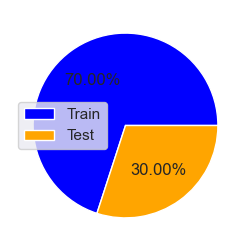

In [79]:
plt.figure(figsize=(3,3))
plt.pie([len(x_train),len(x_test)],autopct="%.2f%%",colors=['blue','orange'])
plt.legend(['Train','Test'])
plt.show()

In [80]:
x_train.select_dtypes(include='number').columns

Index(['cc_freq', 'cc_freq_class', 'job', 'age', 'gender_M', 'category',
       'distance_km', 'hour', 'hours_diff_bet_trans', 'amt'],
      dtype='object')

In [81]:
from datasist.structdata import detect_outliers
def count_outliers(l:list):
    for col in l:
        print(f'Outliers In {col}:',len(detect_outliers(x_train,0,[col])))

In [82]:
def boxplot_outlier(ds:dict):
    plt.figure(figsize=(18,8))
    c=1
    for _,df_x in ds.items():
        for col in ['hours_diff_bet_trans','amt']:
            plt.subplot(2,2,c)
            df_x[col].plot(kind='box',vert=False)
            c+=1
    plt.suptitle('Detecting Outliers in Train|Test Data',fontsize=20)
    plt.tight_layout()

Outliers In hours_diff_bet_trans: 86989
Outliers In amt: 67290


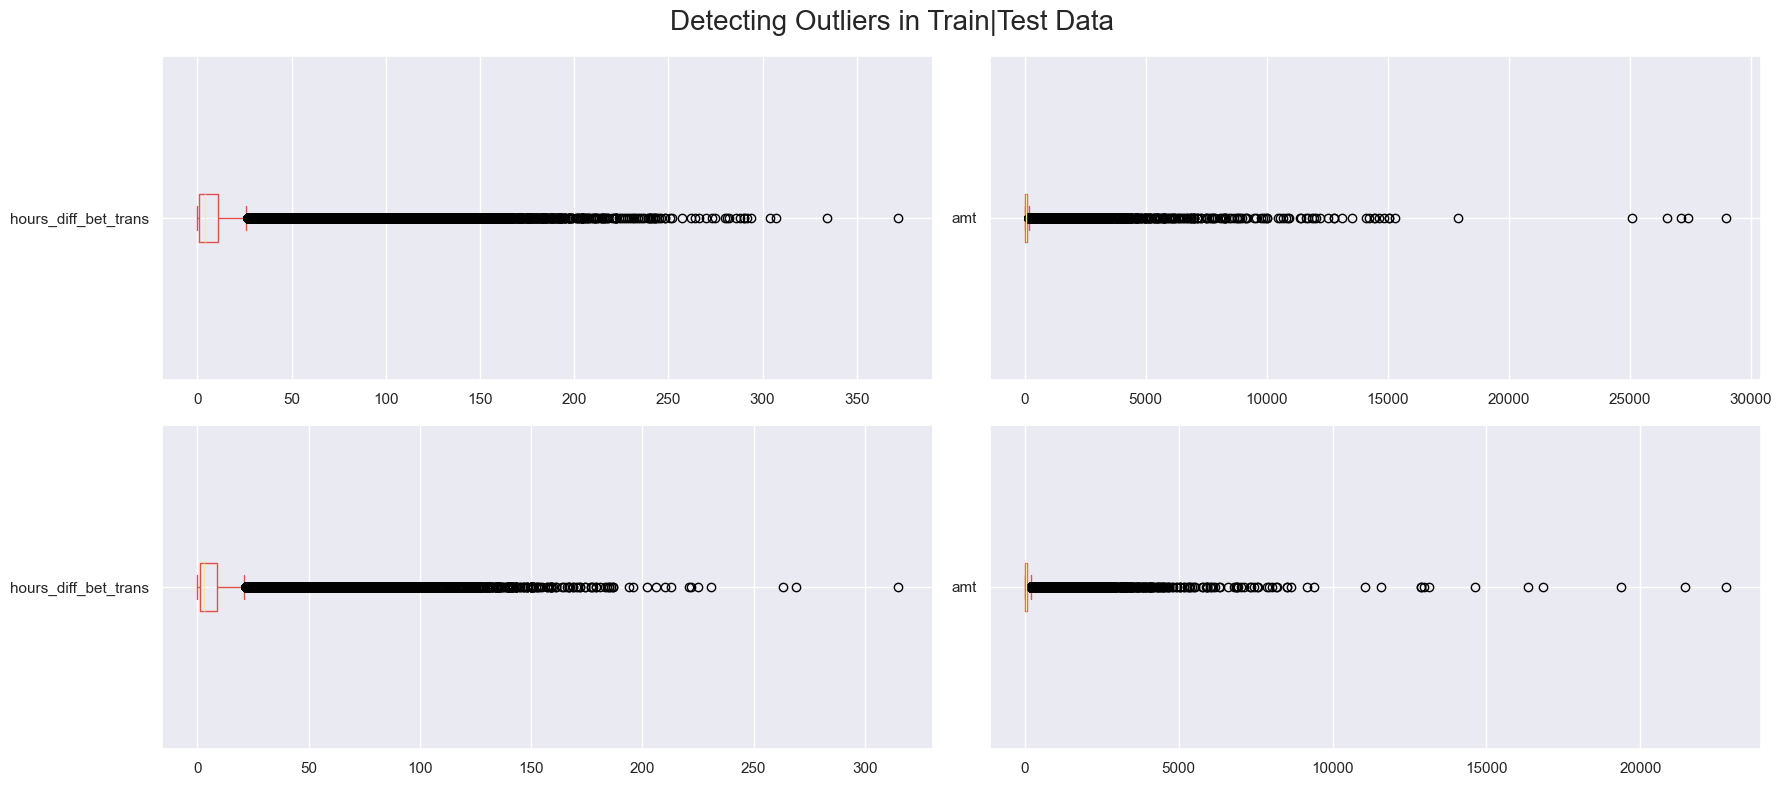

In [83]:
datasets={'x_train':x_train,'x_test':x_test}
cols=['hours_diff_bet_trans','amt']
count_outliers(cols)
boxplot_outlier(datasets)

In [84]:
#aplying log scale
for col in cols:
    x_train[col]=np.log1p(x_train[col])
    x_test[col]=np.log1p(x_test[col])

Outliers In hours_diff_bet_trans: 222
Outliers In amt: 818


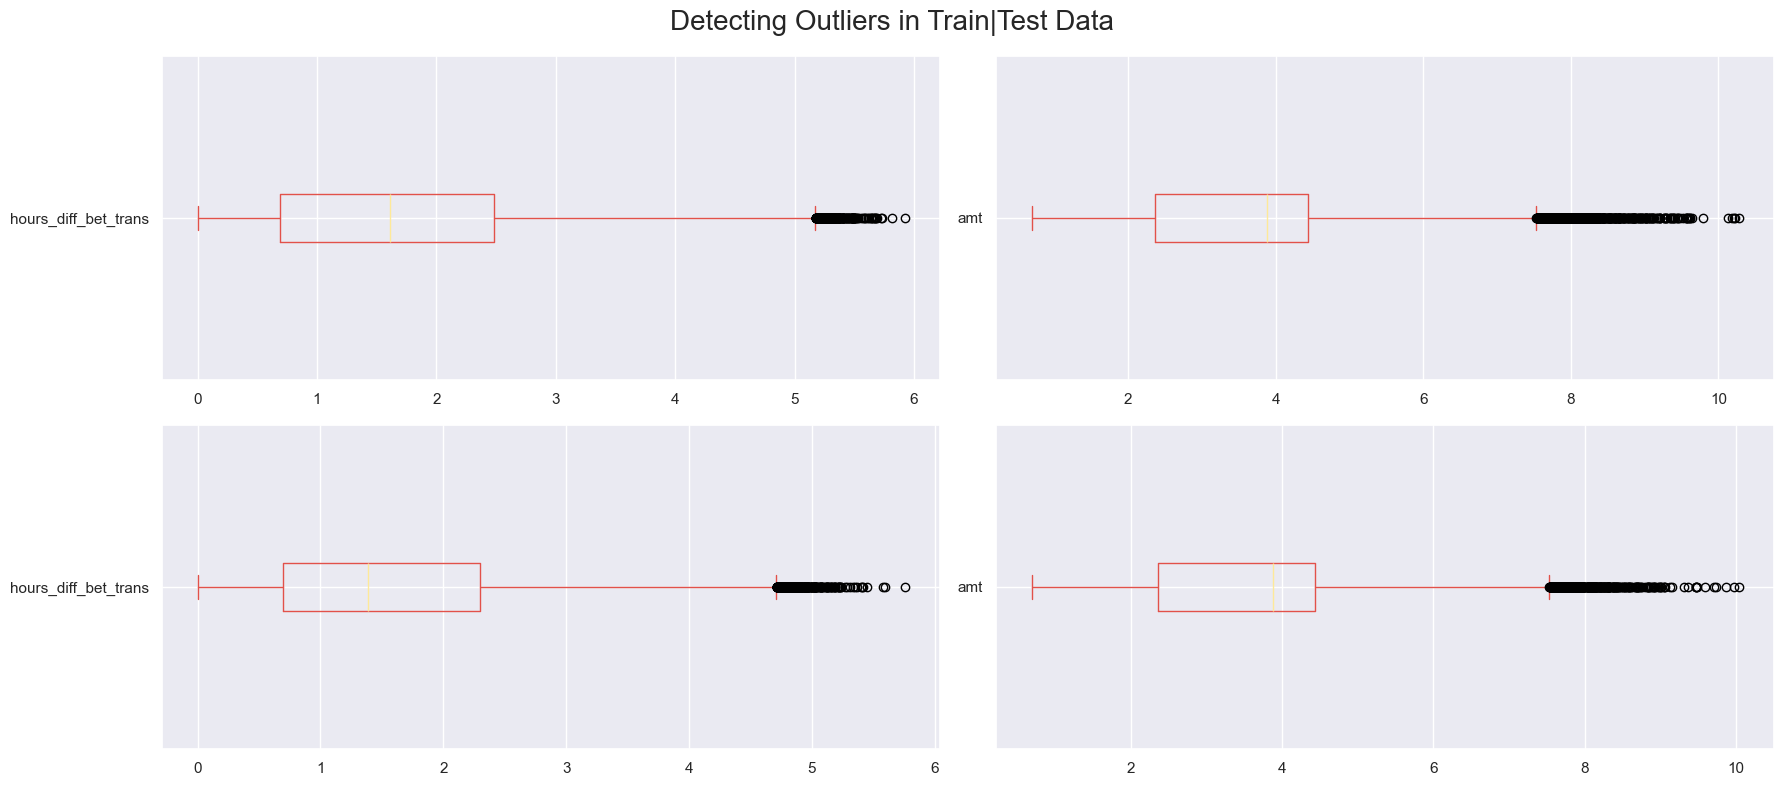

In [85]:
count_outliers(cols)
boxplot_outlier(datasets)

In [86]:
x_train.head()

,cc_freq,cc_freq_class,job,age,gender_M,category,distance_km,hour,hours_diff_bet_trans,amt
0,2196,3,0.163804,33,0,0.925860,127.61,-1.605910,0.000000,2.112635
1,2196,3,0.163804,33,0,-0.238221,110.31,-1.617798,2.995732,3.987872
2,2196,3,0.163804,33,0,-0.238221,21.79,-1.617798,0.000000,4.419804
3,2196,3,0.163804,33,0,-1.019735,87.20,-1.605910,1.386294,3.577669
4,2196,3,0.163804,33,0,-1.238421,74.21,-1.605910,0.000000,3.338613


In [87]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


In [88]:
import joblib
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
evl_models={'Logistic Regression':LogisticRegression(random_state=10),
           'Decision Tree':DecisionTreeClassifier(random_state=10),
          'Random Forest':RandomForestClassifier(random_state=10),
           'XGBOOST': XGBClassifier(objective='binary:logistic')}

In [90]:
def evl_model(xtrain,ytrain,xtest,ytest):
    sns.set(rc={'figure.figsize':(18,6)})
    i=0
    for name,models in evl_models.items(): 
        fig,axs=plt.subplots(1,2)
        print('Model:'+name)
        print('_'*50)
        start=time()
        models.fit(xtrain,ytrain)
        #joblib.dump(models,name+'.pkl')
        y_pred=models.predict(xtest)
        
        end=time()
        cm=confusion_matrix(ytest,y_pred,labels=models.classes_)
        cmd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=models.classes_)
        cmd.plot(colorbar=False,ax=axs[i])
        axs[i].grid(False)
        y_proba=models.predict_proba(xtest)
        fpr,tpr,_=roc_curve(ytest,y_proba[:,1])
        roc_display=RocCurveDisplay(fpr=fpr,tpr=tpr).plot(ax=axs[i+1])
        axs[i+1].plot([0,1],[1,0],color='g')
        plt.tight_layout()
        plt.show()
        #we focus on recall = TP/TP+FN
        #such that it's score that model predict (non-fraud) while it's fraud
        print('Recall Score: {}\nPrecision: {}\nF1-Score: {}\nAccuracy Score: {}\nAUC Score: {}\nRunning Time: {} Mins'.format(recall_score(ytest,y_pred),precision_score(ytest,y_pred),f1_score(ytest,y_pred),accuracy_score(ytest,y_pred),roc_auc_score(ytest,y_proba[:,1]),round((end-start)/60.0,2)))
        print('*'*50)
        
        

Model:Logistic Regression
__________________________________________________


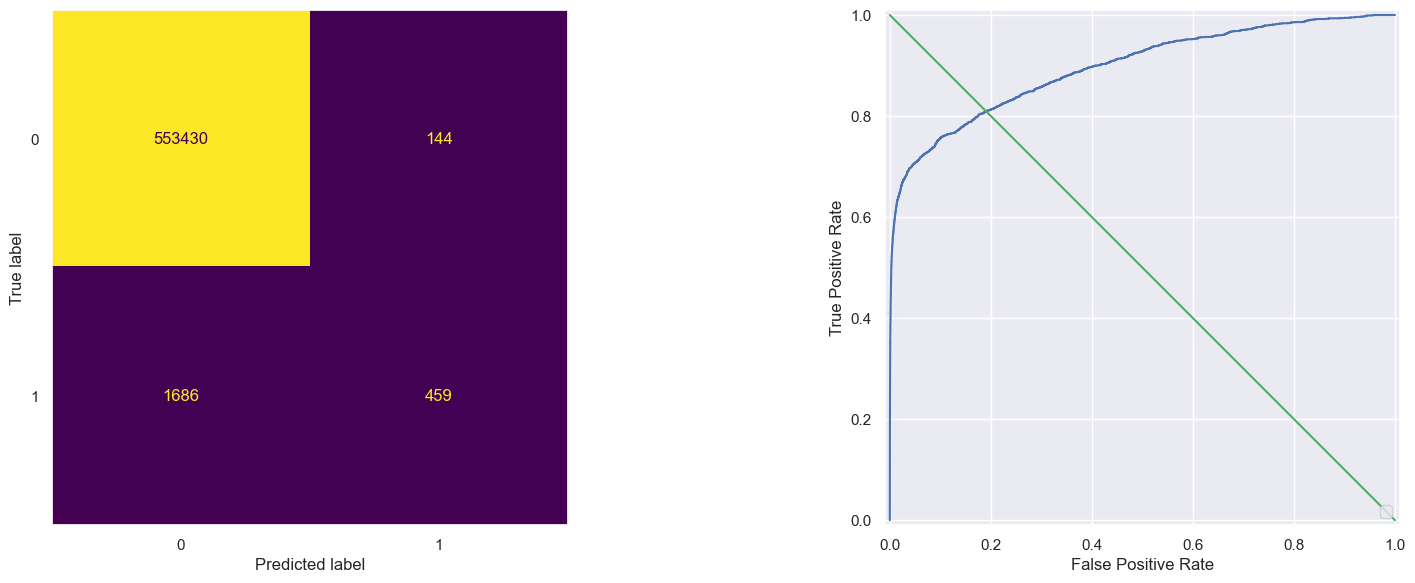

Recall Score: 0.213986013986014
Precision: 0.7611940298507462
F1-Score: 0.33406113537117904
Accuracy Score: 0.9967069688097762
AUC Score: 0.8967385269780253
Running Time: 0.02 Mins
**************************************************
Model:Decision Tree
__________________________________________________


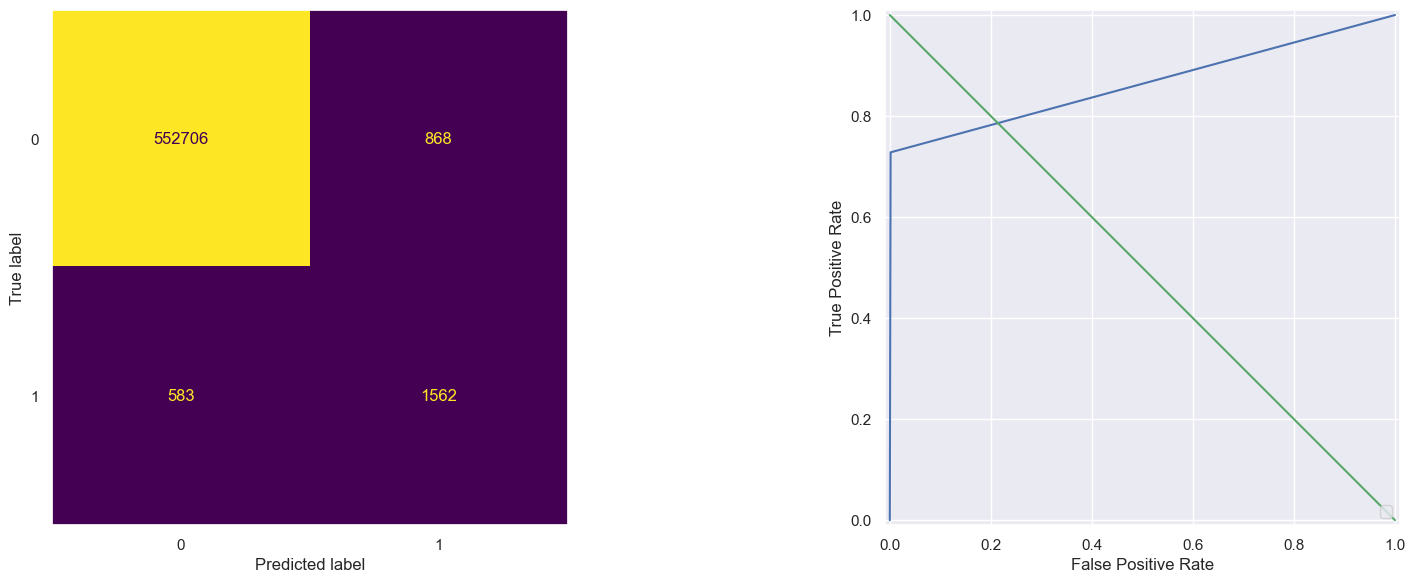

Recall Score: 0.7282051282051282
Precision: 0.642798353909465
F1-Score: 0.6828415300546448
Accuracy Score: 0.9973889681655657
AUC Score: 0.8633185677443537
Running Time: 0.13 Mins
**************************************************
Model:Random Forest
__________________________________________________


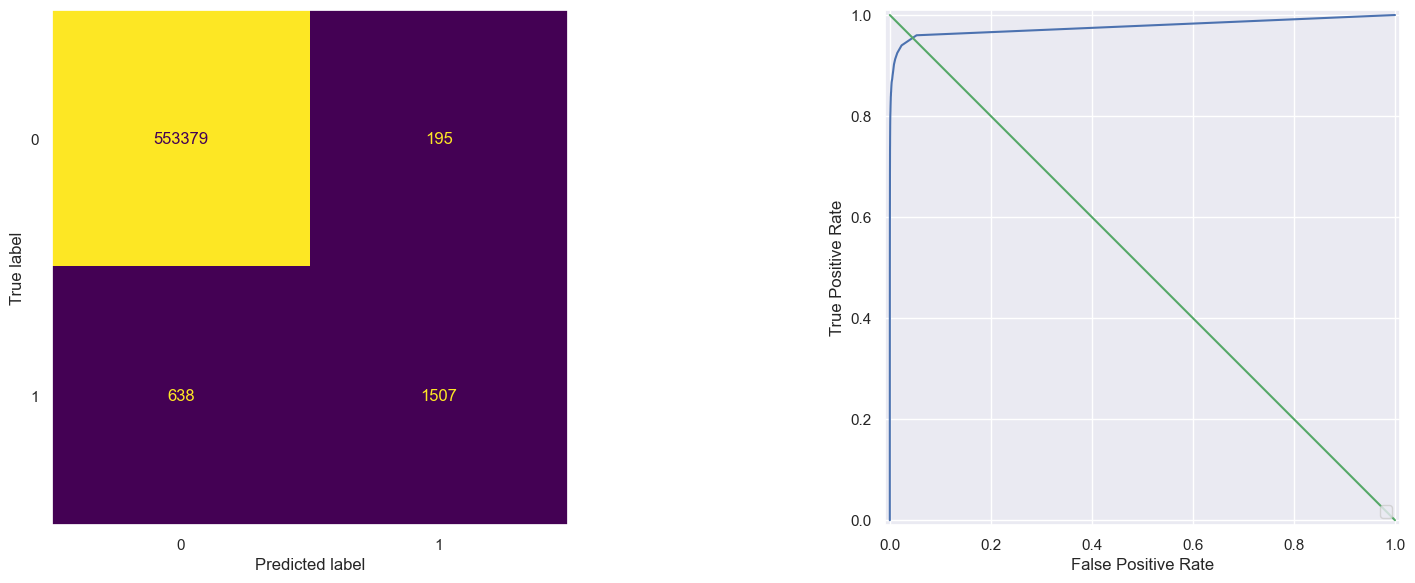

Recall Score: 0.7025641025641025
Precision: 0.8854289071680376
F1-Score: 0.7834676371198336
Accuracy Score: 0.9985010409937396
AUC Score: 0.977134137706708
Running Time: 3.67 Mins
**************************************************
Model:XGBOOST
__________________________________________________


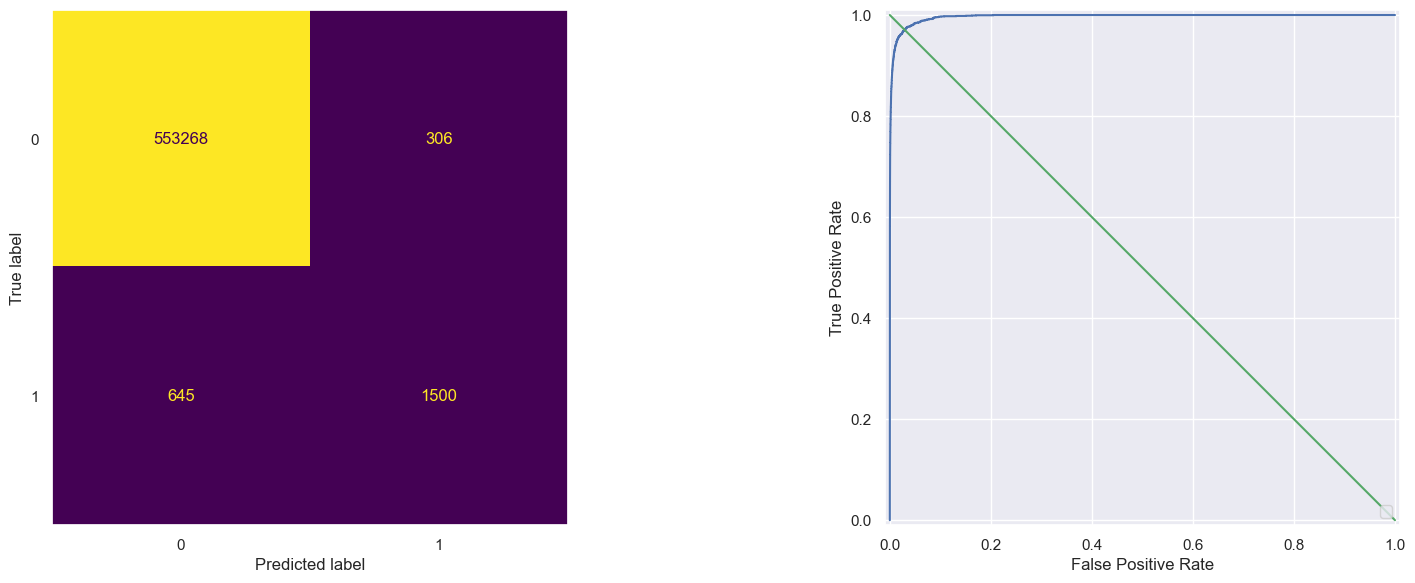

Recall Score: 0.6993006993006993
Precision: 0.8305647840531561
F1-Score: 0.7593014426727411
Accuracy Score: 0.998288703463441
AUC Score: 0.9967065015609564
Running Time: 0.06 Mins
**************************************************


In [91]:
evl_model(x_train,y_train,x_test,y_test)

In [92]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train,y_train=smote.fit_resample(x_train,y_train)

<Axes: ylabel='count'>

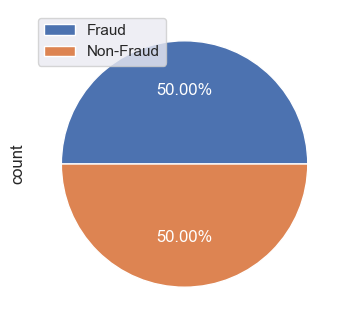

In [93]:
y_train.value_counts().plot(kind='pie',figsize=(4,4),autopct='%.2f%%',textprops={'color':'white'},labels=['Fraud','Non-Fraud'],legend=True)

In [94]:
def eve_model(xtrain,ytrain,xtest,ytest):
    sns.set(rc={'figure.figsize':(18,6)})
    i=0
    for name,models in evl_models.items(): 
        fig,axs=plt.subplots(1,2)
        print('Model:'+name)
        print('_'*50)
        start=time()
        models.fit(xtrain,ytrain)
        joblib.dump(models,name+'.pkl')
        y_pred=models.predict(xtest)
        
        end=time()
        cm=confusion_matrix(ytest,y_pred,labels=models.classes_)
        cmd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=models.classes_)
        cmd.plot(colorbar=False,ax=axs[i])
        axs[i].grid(False)
        y_proba=models.predict_proba(xtest)
        fpr,tpr,_=roc_curve(ytest,y_proba[:,1])
        roc_display=RocCurveDisplay(fpr=fpr,tpr=tpr).plot(ax=axs[i+1])
        axs[i+1].plot([0,1],[1,0],color='g')
        plt.tight_layout()
        plt.show()
        #we focus on recall = TP/TP+FN
        #such that it's score that model predict (non-fraud) while it's fraud
        print('Recall Score: {}\nPrecision: {}\nF1-Score: {}\nAccuracy Score: {}\nAUC Score: {}\nRunning Time: {} Mins'.format(recall_score(ytest,y_pred),precision_score(ytest,y_pred),f1_score(ytest,y_pred),accuracy_score(ytest,y_pred),roc_auc_score(ytest,y_proba[:,1]),round((end-start)/60.0,2)))
        print('*'*50)
        
        

Model:Logistic Regression
__________________________________________________


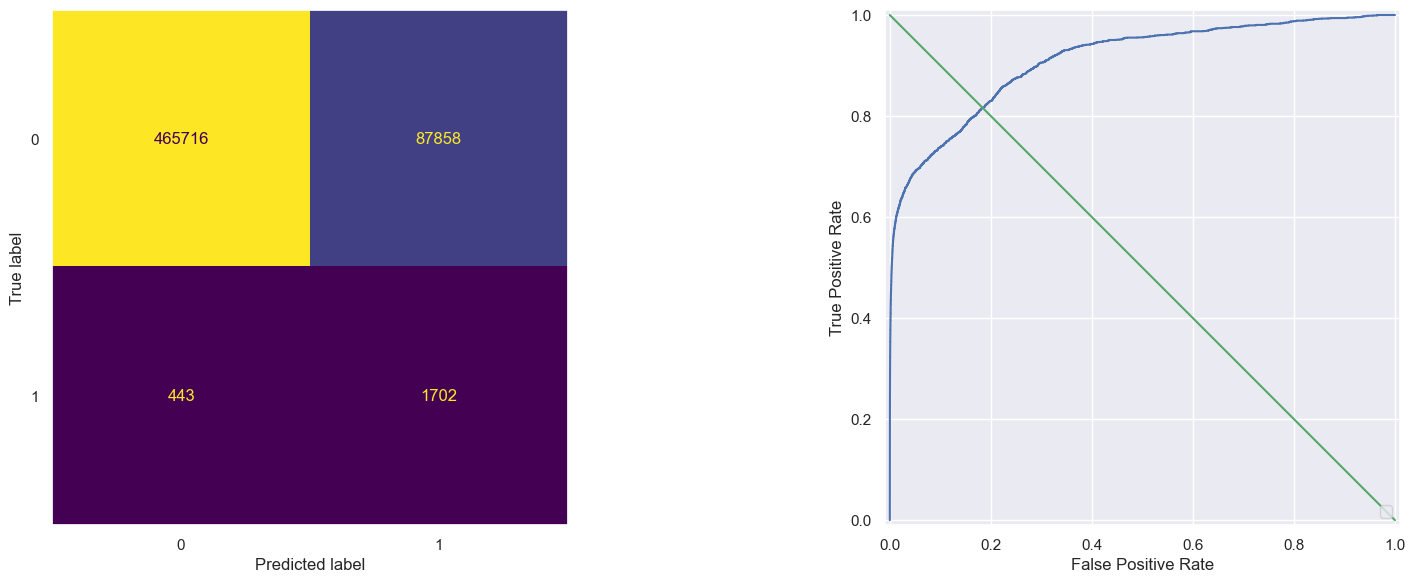

Recall Score: 0.7934731934731934
Precision: 0.01900401965163019
F1-Score: 0.0371190229540374
Accuracy Score: 0.8411049469246148
AUC Score: 0.9107202172906125
Running Time: 0.04 Mins
**************************************************
Model:Decision Tree
__________________________________________________


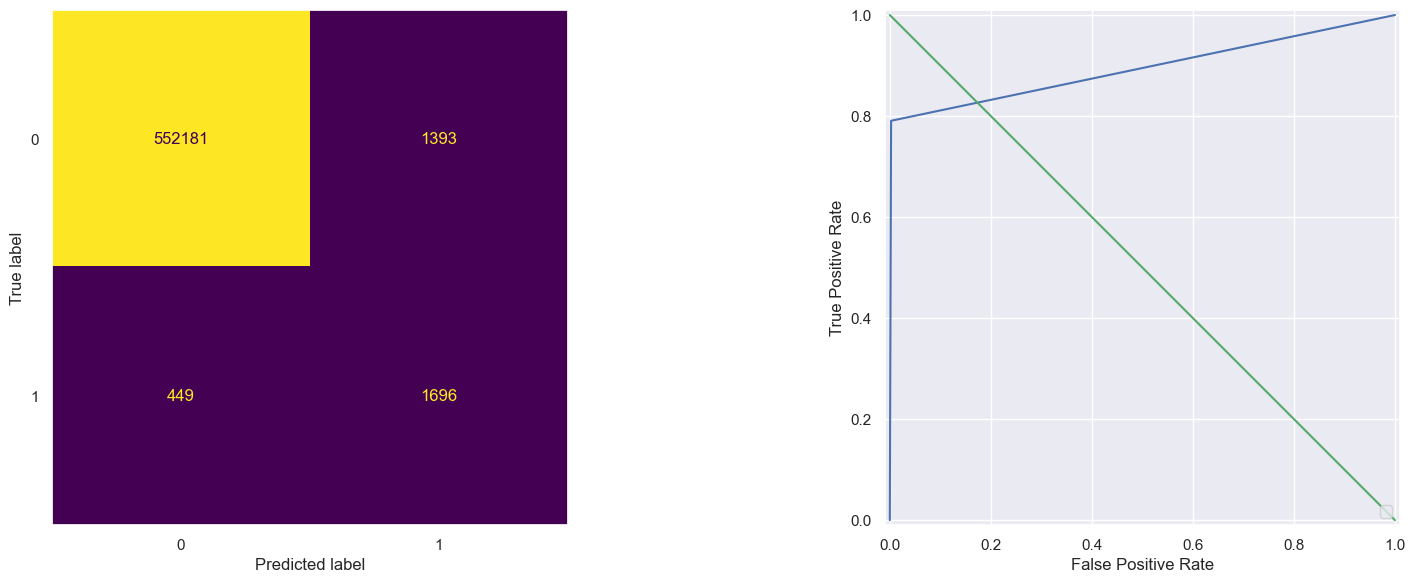

Recall Score: 0.7906759906759907
Precision: 0.5490449983813532
F1-Score: 0.6480703095147115
Accuracy Score: 0.9966853751626271
AUC Score: 0.8940798076340931
Running Time: 0.75 Mins
**************************************************
Model:Random Forest
__________________________________________________


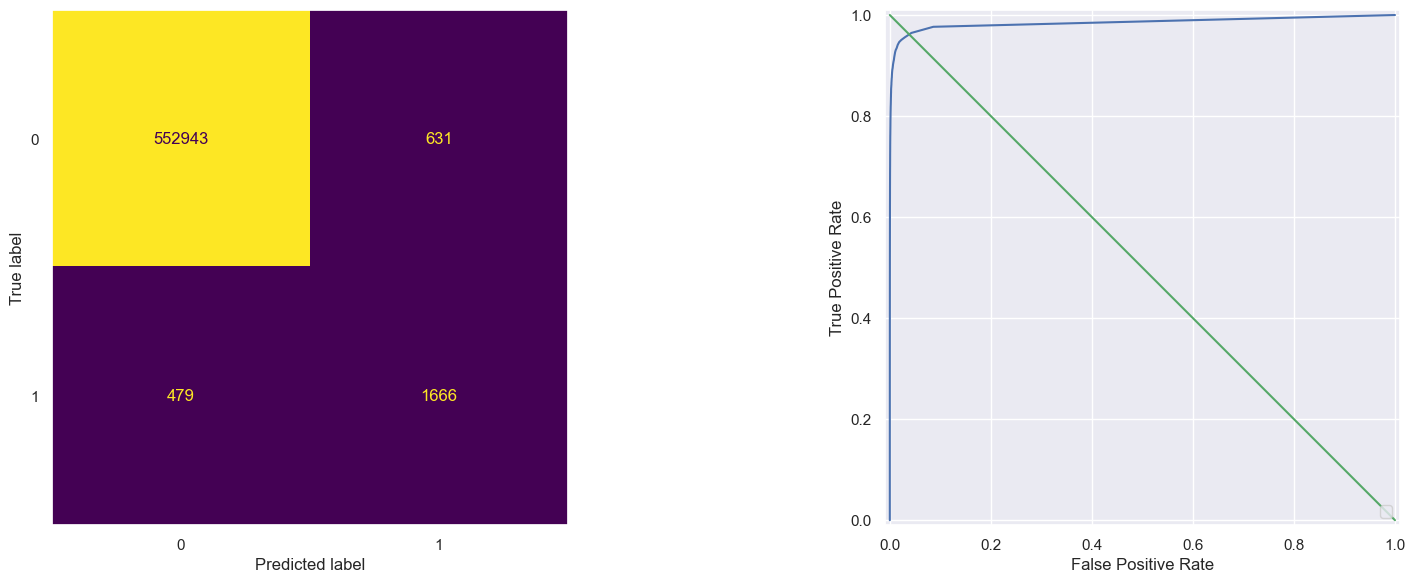

Recall Score: 0.7766899766899766
Precision: 0.7252938615585547
F1-Score: 0.75011256190905
Accuracy Score: 0.9980025876387167
AUC Score: 0.9850601267257397
Running Time: 15.19 Mins
**************************************************
Model:XGBOOST
__________________________________________________


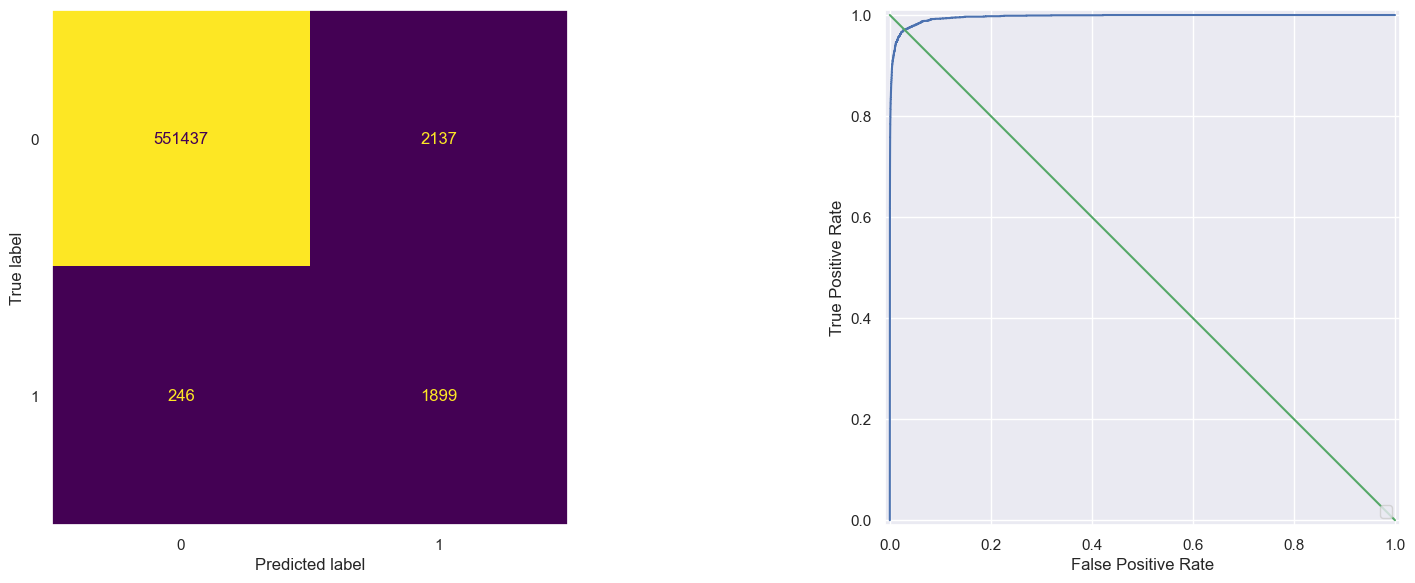

Recall Score: 0.8853146853146853
Precision: 0.4705153617443013
F1-Score: 0.6144636790163404
Accuracy Score: 0.995711861570326
AUC Score: 0.9962105992100174
Running Time: 0.11 Mins
**************************************************


In [95]:
eve_model(x_train,y_train,x_test,y_test)

In [107]:
scaler=joblib.load('scaler.pkl')
pre=scaler.transform(res)

In [111]:
rc_model=joblib.load('Random Forest.pkl')
pred=rc_model.predict(pre)
print(pred[0])

0


In [112]:
xgmodel=joblib.load('XGBOOST.pkl')
pred=xgmodel.predict(pre)
print(pred[0])

0


In [114]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline steps
pipe = [
    ('scaler', StandardScaler()),  # Step 1: Scaling features
    ('classifier', RandomForestClassifier(random_state=10))  # Step 2: RandomForestClassifier
]

# Create the pipeline
pipeline = Pipeline(pipe)

In [115]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=10))])

In [116]:
pipeline.predict(res)

array([0], dtype=int64)

In [117]:
joblib.dump(pipeline,'rc_model_pipe.pkl')

['rc_model_pipe.pkl']

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
xgpipe = [
    ('scaler', StandardScaler()),             
    ('classifier', XGBClassifier())           
]

In [119]:
xgpipeline = Pipeline(xgpipe)

In [121]:
xgpipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [122]:
xgpipeline.predict(res)

array([0])

In [123]:
joblib.dump(xgpipeline,'xg_model_pipline.pkl')

['xg_model_pipline.pkl']

### Recall:
High recall means the model is effectively identifying most of the fraudulent transactions. It's crucial to have high recall to minimize false negatives (i.e., missing actual fraud cases).

### AUC Score: 
The AUC (Area Under the ROC Curve) score measures the model's ability to distinguish between positive and negative cases. A higher AUC indicates better performance in separating fraudulent and non-fraudulent transactions.

## RandomForest Classifier:

- Recall Score: 0.7767
- AUC Score: 0.9851
## XGBoost:

- Recall Score: 0.8853
- AUC Score: 0.9962

Both models have high AUC scores, indicating good overall performance in distinguishing between fraudulent and non-fraudulent transactions. However, XGBoost has a higher recall score, suggesting it is better at capturing fraudulent transactions, which is crucial for fraud detection tasks. Therefore, based on the provided metrics, XGBoost appears to be the better choice for credit card fraud detection.